In [1]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import numpy as np
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), preds_probas)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = np.array([1 if i >= optimal_proba_cutoff else 0 for i in preds_probas])

optimal_proba_cutoff

print("Accuracy Score After Thresholding: {}".format(accuracy_score(y_true, roc_predictions)))
print("Precision Score After Thresholding: {}".format(precision_score(y_true, roc_predictions)))
print("Recall Score After Thresholding: {}".format(recall_score(y_true, roc_predictions)))
print("F1 Score After Thresholding: {}".format(f1_score(y_true, roc_predictions)))

print(classification_report(y_true, roc_predictions, target_names=["CG","OR"]))checkpoint = "../../data/classification/models/detector-base.pt"
data = torch.load(checkpoint, map_location=device)

In [4]:
model_name = "roberta-base"
model = RobertaForSequenceClassification.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [5]:
model.load_state_dict(data['model_state_dict'],strict=False)
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [6]:
device="cuda"
query = """I liked nothing about this dress. The only reason I gave it 4 stars is because I ordered the size 6.5 and it fit perfectly. The fabric is a nice thin material and the color is vibrant. It's a little thin on me but it's worth it. The material is soft and comfortable. I love the color and the fit. I'm 5'4" and it fits just right. I'm a size 6 and it's a bit long on me so I ordered a 6 in order to fit the smaller size. I'm 5'3" and it fits perfect and I got it in a medium. It's a nice dress and I'm very pleased with it. I like that it's a bit small for me and I can wear it with a top or skirt. I also like that the fabric is made of a good material. I wear a size 5 and it fits well. I'm 5'3" and it fits just right. I'm 5'6" and it fits just right. I'm 5'4" and it fits just right. I wear a size 10.5 and it's a little tight on me. I have a small waist and it's not too tight on me. It's a nice little dress. I will buy more colors.Very nice dress.  It is well made and it is very comfortable.  I received a free sample and will see if I can wear it again.  I would definitely buy another one.  I am very happy with this dress.I love these boots!  I have been wearing them for almost 8 months now and I love them so much that I purchased a second pair.  They are very comfortable and look great. """
tokens = tokenizer.encode(query)
all_tokens = len(tokens)
tokens = tokens[:tokenizer.model_max_length - 2]
used_tokens = len(tokens)
tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}\nAll Tokens: {all_tokens}\nUsed Tokens: {used_tokens}")

Real Probability: 0.0002431118191452697
Fake Probability: 0.9997568726539612
All Tokens: 351
Used Tokens: 351


In [7]:
device="cuda"
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
tokens = tokenizer.encode(query)
all_tokens = len(tokens)
tokens = tokens[:tokenizer.model_max_length - 2]
used_tokens = len(tokens)
tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
mask = torch.ones_like(tokens)

with torch.no_grad():
    logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
    probs = logits.softmax(dim=-1)

fake, real = probs.detach().cpu().flatten().numpy().tolist()

print(f"Real Probability: {real}\nFake Probability: {fake}\nAll Tokens: {all_tokens}\nUsed Tokens: {used_tokens}")

Real Probability: 0.9997749924659729
Fake Probability: 0.00022505233937408775
All Tokens: 408
Used Tokens: 408


In [7]:
encoded_label_dict = {"CG" : 0, "OR" : 1}
def encode_label(x):
    return encoded_label_dict.get(x,-1)

In [8]:
df = pd.read_csv("../../data/classification/data/deception_data.csv")

In [9]:
df["target"] = df["label"].apply(lambda x: encode_label(x))

In [10]:
test_df = df

In [11]:
test_df.label.value_counts()

CG    800
OR    800
Name: label, dtype: int64

In [13]:
def predict(query, model, tokenizer, device="cuda"):
    tokens = tokenizer.encode(query)
    all_tokens = len(tokens)
    tokens = tokens[:tokenizer.model_max_length - 2]
    used_tokens = len(tokens)
    tokens = torch.tensor([tokenizer.bos_token_id] + tokens + [tokenizer.eos_token_id]).unsqueeze(0)
    mask = torch.ones_like(tokens)

    with torch.no_grad():
        logits = model(tokens.to(device), attention_mask=mask.to(device))[0]
        probs = logits.softmax(dim=-1)

    fake, real = probs.detach().cpu().flatten().numpy().tolist()
    return real

In [14]:
query = """I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little "sticky" to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day."""
predict(query,model,tokenizer)

0.9997749924659729

In [16]:
preds, preds_probas = [],[]
for i, row in test_df.iterrows():
    query = row["text_"]
    pred = predict(query,model,tokenizer)
    preds_probas.append(pred)
    if pred >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


In [18]:
from sklearn.metrics import confusion_matrix
y_true = test_df.target.values
y_pred = preds
confusion_matrix(y_true,y_pred)

array([[115, 685],
       [ 47, 753]])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
acc = accuracy_score(y_true,y_pred)
precision = precision_score(y_true,y_pred)
recall = recall_score(y_true,y_pred)

In [20]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 54.25; Precision:52.36439499304589; Recall:94.125


In [21]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.71      0.14      0.24       800
          OR       0.52      0.94      0.67       800

    accuracy                           0.54      1600
   macro avg       0.62      0.54      0.46      1600
weighted avg       0.62      0.54      0.46      1600



In [22]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_true, preds_probas, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_true))]
p_fpr, p_tpr, _ = roc_curve(y_true, random_probs, pos_label=1)

In [23]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.5951039062500001


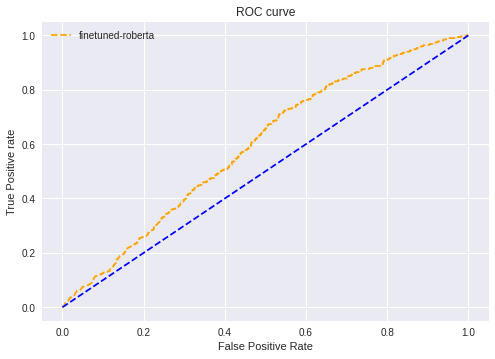

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='finetuned-roberta')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [25]:
import numpy as np
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), preds_probas)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = np.array([1 if i >= optimal_proba_cutoff else 0 for i in preds_probas])

In [26]:
optimal_proba_cutoff

0.9998264908790588

In [30]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred), f1_score(y_true, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.5425, 0.51625
Precision Score Before and After Thresholding: 0.5236439499304589, 0.5844155844155844
Recall Score Before and After Thresholding: 0.94125, 0.1125
F1 Score Before and After Thresholding: 0.6729222520107238, 0.18867924528301885


In [31]:
print("Classification Report After Thresholding\n")
print(classification_report(y_true, roc_predictions, target_names=["CG","OR"]))

Classification Report After Thresholding

              precision    recall  f1-score   support

          CG       0.51      0.92      0.66       800
          OR       0.58      0.11      0.19       800

    accuracy                           0.52      1600
   macro avg       0.55      0.52      0.42      1600
weighted avg       0.55      0.52      0.42      1600



#### Writing predictions to disc

In [29]:
preds_df_rows = []
for i, row in valid_df.reset_index().iterrows():
    query = row["text_"]
    pred_prob = preds_probas[i]
    pred_label = preds[i]
    preds_df_rows.append([pred_prob,pred_label])
preds_df = pd.DataFrame(preds_df_rows, columns=["GPT2_Detector_Model_Probability","GPT2_Detector_Model_Prediction"])

In [30]:
preds_df.to_csv("../../data/classification/data/gpt2_detector_predictions.csv", index=None)